In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\DS PYTHON\Assignment\bank-full.csv",delimiter=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA

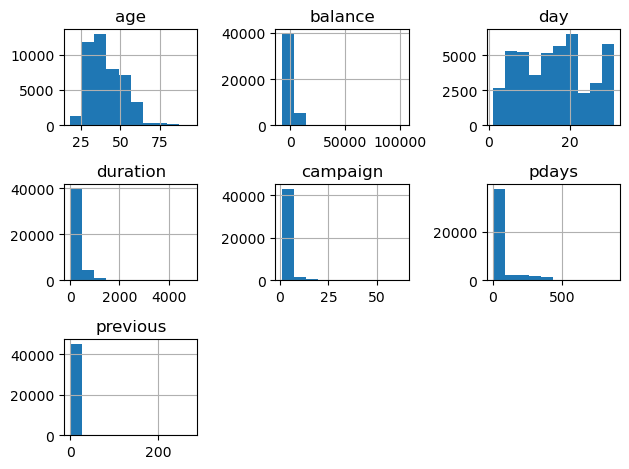

In [16]:
df.hist()
plt.tight_layout()

C:\Users\psaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

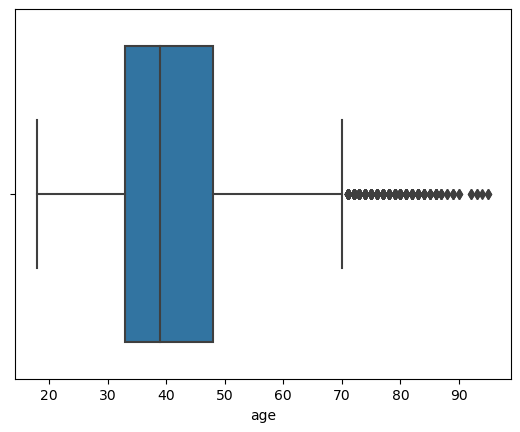

In [15]:
sb.boxplot(df['age'])

In [25]:
len(df[df['age']>70])

487

In [21]:
# In the age column the age more than 70 consider as an outlier as we can see in the boxplot 
# and in the histogram the age column is right skewed
# so we replace the value with median value

In [34]:
median=df['age'].median()

In [35]:
median

39.0

In [39]:
df['age']=np.where(df['age']>70,median,df['age'])

C:\Users\psaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

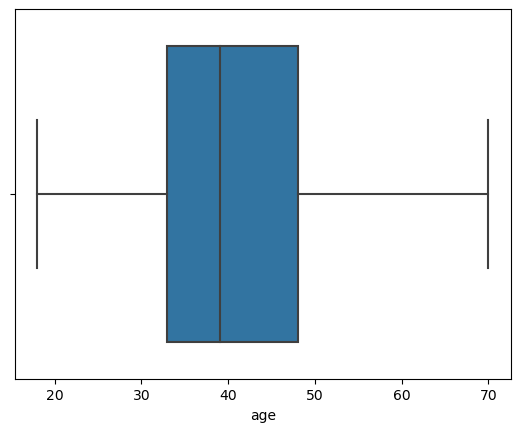

In [40]:
sb.boxplot(df['age'])

In [43]:
# so we replace the outlier with median

In [44]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28.0,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42.0,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58.0,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43.0,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [49]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [69]:
# NO null value is present

## Data Transformation

In [53]:
# Encoding using pandas get dummy function

In [56]:
df=pd.get_dummies(data=df,columns=['job','marital','education','month','poutcome'])

In [57]:
df.head(2)

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,no,2143,yes,no,unknown,5,261,1,-1,...,0,0,1,0,0,0,0,0,0,1
1,44.0,no,29,yes,no,unknown,5,151,1,-1,...,0,0,1,0,0,0,0,0,0,1


In [58]:
# droping the uncessary column

In [60]:
df.drop(columns=['contact'],inplace=True)

In [61]:
df.head(5)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,no,2143,yes,no,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44.0,no,29,yes,no,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33.0,no,2,yes,yes,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47.0,no,1506,yes,no,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33.0,no,1,no,no,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [62]:
# converting the categorical column (yes,no) into binary column

In [63]:
df['default']=np.where(df['default'].str.contains("yes"),1,0)
df['housing']=np.where(df['housing'].str.contains('yes'),1,0)
df['loan']=np.where(df['loan'].str.contains('yes'),1,0)
df['y']=np.where(df['y'].str.contains('yes'),1,0)

In [64]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44.0,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33.0,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47.0,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33.0,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,0,825,0,0,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,39.0,0,1729,0,0,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,39.0,0,5715,0,0,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57.0,0,668,0,0,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [67]:
pd.set_option('display.max_columns',None)

In [68]:
df.head(4)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44.0,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33.0,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47.0,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [70]:
# Spliting the data into training as well as testing 

In [90]:
x=pd.concat([df.iloc[:,:10],df.iloc[:,12:]],axis=1)
y=df['y']

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

## Model Building

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
lg=LogisticRegression()

In [98]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [99]:
ypred=lg.predict(xtest)

In [100]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [102]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9978
           1       0.59      0.21      0.30      1325

    accuracy                           0.89     11303
   macro avg       0.74      0.59      0.62     11303
weighted avg       0.87      0.89      0.87     11303



In [114]:
# the False Positive accuracy is bit low as it only predicted 21 % positive out of total positive

In [115]:
# The data is highly unbalanced as the yes in the y column has only 5000 + record and no has 39000+ record

In [116]:
confusion_matrix(ytest,ypred)

array([[9785,  193],
       [1052,  273]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted Value')

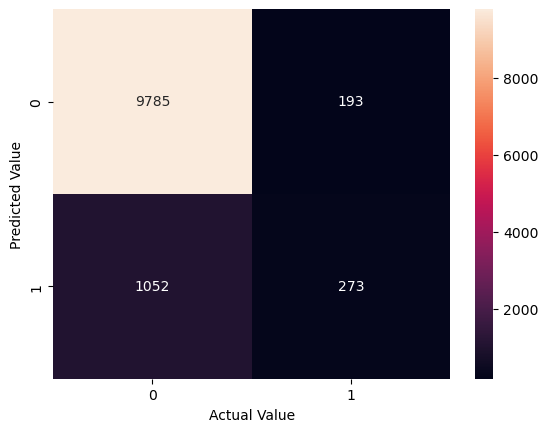

In [117]:
sb.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='.4g')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [118]:
# From the bank's perspective, the more significant concern 
# would be a false negative, i.e., failing to identify clients who have subscribed to a term deposit.
# so our model is good that it is rate of misclassified false negative is low

## Threshold Selection

In [119]:
proba=lg.predict_proba(xtest)[:,1]

### Roc Auc curve

In [120]:
from sklearn.metrics import roc_auc_score,roc_curve

In [121]:
auc=roc_auc_score(ytest,proba)
auc

0.8384727910837806

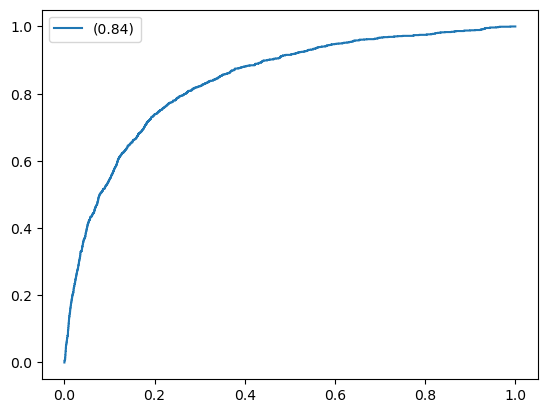

In [122]:
fpr,tpr,thresh=roc_curve(ytest,proba)
plt.plot(fpr,tpr,label='(%0.2f)'%auc)
plt.legend()

In [123]:
# as per our statement we are more concern about the false negative value
# in our current model the false negative value is less compare to false positive 
# so we dont change the threshold value to get more change the false positive value

In [124]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9978
           1       0.59      0.21      0.30      1325

    accuracy                           0.89     11303
   macro avg       0.74      0.59      0.62     11303
weighted avg       0.87      0.89      0.87     11303



In [ ]:
# accuracy is 89 % 